In [8]:
import sys
sys.path.append('/home/tpopova/prj/PB_SCF/05_solvent_chi_flat/py_files')

import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

import pandas as pd
import numpy as np

from create_in import create_in
from out_reader import out_reader
from scipy.signal import find_peaks

# График: поменяли диэлектрическую проницаемость среды

Бъеррумовская длина lb:

$l_B = \frac{e^2}{4 \pi \epsilon_0 \epsilon_r k_B T}$

* $e$ = 	1.602176634×10−19 C
* $\epsilon_0$ = 8.8541878188(14)×10−12
* \epsilon_r = 80
* $k_B$ = 1.380649×10−23
* T = 293

In [9]:
import scipy.constants as const

# Заданные значения
lb = 1.0e-9  # Бьеррумовская длина в метрах
e = const.e  # заряд электрона в Кулонах
epsilon_0 = const.epsilon_0  # электрическая постоянная в Ф/м
k_B = const.k  # постоянная Больцмана в Дж/К
T = 293  # температура в Кельвинах

# Уравнение для расчета epsilon_r
def calculate_epsilon_r(lb, e, epsilon_0, k_B, T):
    return e**2 / (4 * const.pi * epsilon_0 * lb * k_B * T)

# Вычисляем epsilon_r
epsilon_r = calculate_epsilon_r(lb, e, epsilon_0, k_B, T)

print(f"Относительная диэлектрическая проницаемость (epsilon_r): {epsilon_r:.2f}")

Относительная диэлектрическая проницаемость (epsilon_r): 57.03


In [10]:
# pow(10, -2) * 1.66

N = 600

S_namics = 50

alpha = 0.4

Cs = 0.0166

chi = 2.6

chi_surf = 0.5
chi_ions = 0.5

epsilon_r


57.03103989702639

In [11]:
file_name_pro = create_in(
        range_param = 'eps',
        min_val = 80,
        max_val = 80,
        Cs = Cs,
        chi_first_try = 0.5,
        chi_ions_first_try = 0.5,
        chi_surf_first_try = 0.5,
        N_layers_first_try = N - 250,
        N_first_try = N,

        S = S_namics,
        alpha = alpha,
        Kuhn = '1e-09',
        initial_cond = True,
        
        N_layers = N - 250,
        N = N,
        chi = chi,
        chi_ions = chi,
        chi_surf = chi,
        epsilon = round(epsilon_r),
    )
psi, phi_brush, phi_end_brush, phi_Na, phi_Cl = out_reader(alpha = alpha,file_names=file_name_pro)

No output defined! 
No output defined! 
Problem nr 1 out of 2
The program is compiled for the use of 'long double' while 'overflow_protection' is not requested for;
1. Turn on 'overflow_protection'.
2. Compile progrem without the #define 'LongReal' in namics.h. 
NEWTON has been notified.
Your guess:it =  0  E = 2.680532e+00 |g| = 8.075058e+00 alpha = 1.000000e+00 
hessian scaling: 1.55143
it =  1  E = 2.455151e+00 |g| = 7.451660e+00 alpha = 1.123838e-01 
it =  2  E = 3.168534e+00 |g| = 8.131004e+00 alpha = 6.963350e-02 
it =  3  E = 6.650707e+00 |g| = 7.595517e+00 alpha = 1.367429e-02 
it =  4  E = 1.459198e+01 |g| = 7.936520e+00 alpha = 3.143073e-03 
it =  5  E = 6.483747e+00 |g| = 7.494754e+00 alpha = 1.561579e-02 
hessian scaling: 2.12462
it =  6  E = 2.230503e+00 |g| = 6.846196e+00 alpha = 1.133427e-01 
it =  7  E = 2.385224e+00 |g| = 7.609744e+00 alpha = 1.074113e-01 
it =  8  E = 9.095569e+00 |g| = 7.901517e+00 alpha = 8.242726e-03 
it =  9  E = 6.957533e+00 |g| = 7.856950e+00 al

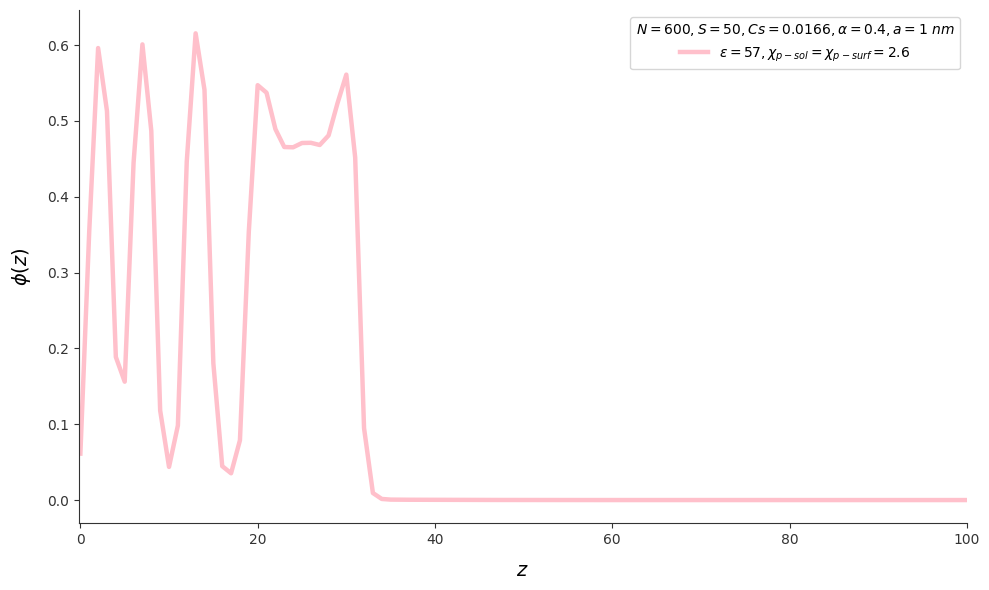

In [12]:
fig, ax = plt.subplots(figsize=(10, 6))  # Создаем один график


ax.plot(phi_brush, color = 'pink', label=f'$ \\epsilon = { round(epsilon_r)}, \\chi_{{p-sol}} = \\chi_{{p-surf}} ={round(chi, 2)}$', linewidth=3.2, linestyle="-")

# Настройка визуализации
ax.set_xlabel("$z$", fontsize=14, labelpad=10)
ax.set_ylabel("$\\phi(z)$", fontsize=14, labelpad=10)
ax.legend(fontsize=10, title=f'$N = {N}, S = {S_namics}, Cs = {Cs}, \\alpha = {alpha}, a = 1 \\ nm$', 
          title_fontsize=10, loc="upper right")

# Добавляем фон и рамку
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#333333")
ax.spines["bottom"].set_color("#333333")
ax.tick_params(axis='both', which='major', labelsize=10, colors="#333333")
ax.set_xlim(-0.2, 100)
# Убираем лишние отступы
plt.tight_layout()

# Отображаем график
plt.show()